In [1]:
"""
this block is needed at the beginning of all notebooks to be able to load modules
"""
import os
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Automatically find and append the project root
root_path = Path.cwd().resolve().parents[1]  # adjust level as needed
data_path = os.path.join(root_path, "data")
src_path = os.path.join(root_path, "src")

if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

In [2]:
from signal_modules.signal_registry import SignalRegistry

In [3]:
signal_registry = SignalRegistry()

In [4]:
signal_registry.available_signals()

['ma_crossover', 'Kalman']

In [5]:
#model = signal_registry.get('ma_crossover')()
model = signal_registry.get('Kalman')()

In [6]:
initial_time = pd.to_datetime('2000-01-01T12:00:00+00:00')
initial_time

Timestamp('2000-01-01 12:00:00+0000', tz='UTC')

In [ ]:
tickers = ['SPY', 'TSLA', 'NVDA', 'BRK-B']  # List of tickers
data_files = [os.path.join(data_path, f"{ticker}.parquet") for ticker in tickers]
data = {ticker: pd.read_parquet(path).loc[initial_time:] for ticker, path in zip(tickers, data_files)}

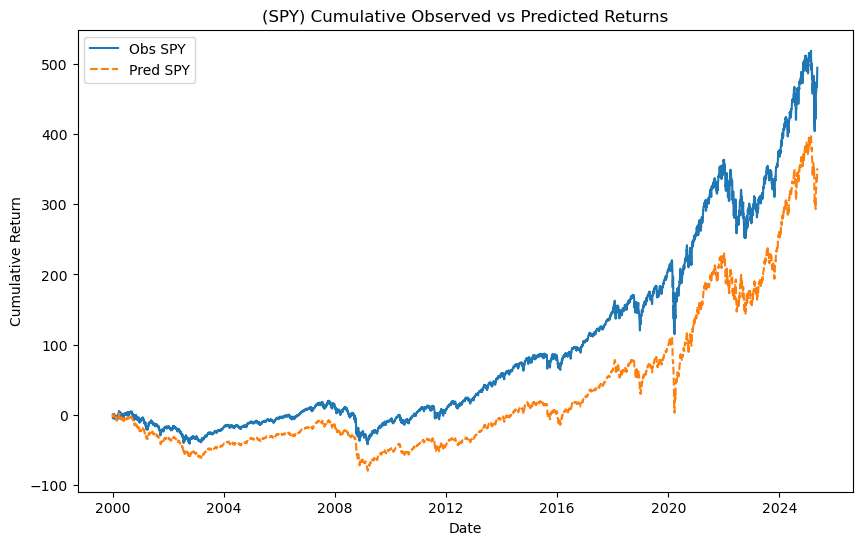

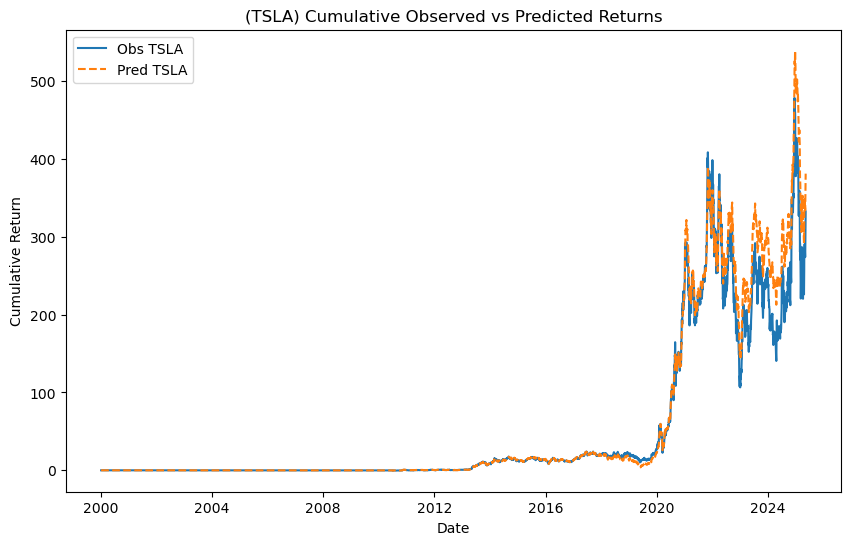

In [8]:
sigs = model.generate_signals(data, diagnostics=True)

In [9]:
sigs

{'SPY': date
 2000-01-03 00:00:00+00:00    0.583333
 2000-01-04 00:00:00+00:00    0.341936
 2000-01-05 00:00:00+00:00    0.437765
 2000-01-06 00:00:00+00:00    0.326585
 2000-01-07 00:00:00+00:00    0.875096
                                ...   
 2025-05-07 00:00:00+00:00    0.690690
 2025-05-08 00:00:00+00:00    0.577288
 2025-05-09 00:00:00+00:00    0.445987
 2025-05-12 00:00:00+00:00    0.747461
 2025-05-13 00:00:00+00:00    0.631149
 Name: buy_confidence, Length: 6379, dtype: float64,
 'TSLA': date
 2000-01-03 00:00:00+00:00    0.583333
 2000-01-04 00:00:00+00:00         NaN
 2000-01-05 00:00:00+00:00    0.870014
 2000-01-06 00:00:00+00:00    0.851198
 2000-01-07 00:00:00+00:00    0.752368
                                ...   
 2025-05-07 00:00:00+00:00    0.482420
 2025-05-08 00:00:00+00:00    0.807581
 2025-05-09 00:00:00+00:00    0.866713
 2025-05-12 00:00:00+00:00    0.867231
 2025-05-13 00:00:00+00:00    0.892299
 Name: buy_confidence, Length: 6379, dtype: float64}